In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Dataset/height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

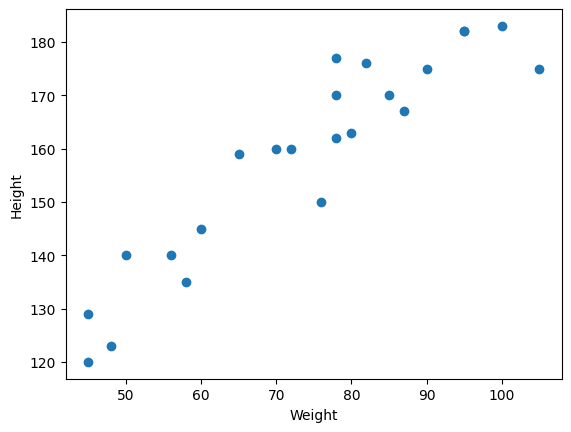

In [4]:
#Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
#Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


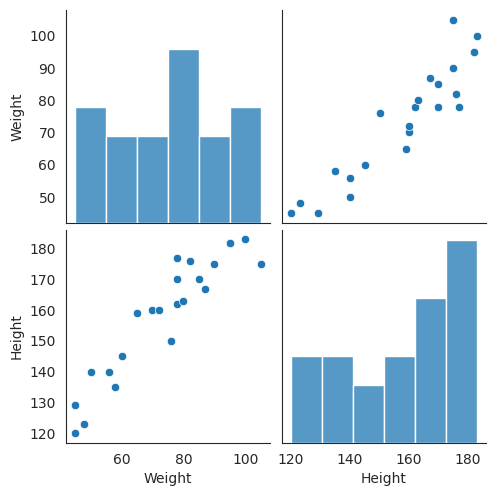

In [6]:
#Seaborn for visualization
import seaborn as sns
sns.set_style('white')
sns.pairplot(df)

In [7]:
#Independent and dependent feature
X = df[['Weight']] #independent feature should be dataframe or 2D array
y = df['Height'] #dependent feature can be series or 1D array

In [8]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
#Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [11]:
print("Coefficient or slope: ",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient or slope:  [17.2982057]
Intercept:  156.47058823529412


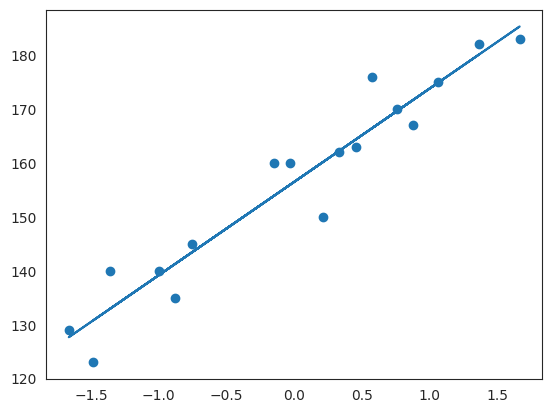

In [12]:
#Plot Training Data
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [13]:
#Prediction for test data
y_pred = regression.predict(X_test)

In [14]:
#Performance Matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("MAE: ",mae)
print("MSE: ",mse)
print("RMSE: ",rmse)

MAE:  9.66512588679501
MSE:  114.84069295228699
RMSE:  10.716374991212605


In [15]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("R2 Score: ",score)

R2 Score:  0.7360826717981276


In [16]:
#Display Adjusted R-Squared
score2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R-Squared: ",score2)

Adjusted R-Squared:  0.6701033397476595


In [17]:
#OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [18]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 10 Aug 2024   Prob (F-statistic):                       0.664
Time:                        17:31:52   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [20]:
#Prediction for new data
regression.predict(sc.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])